# **Hope-to-Skill Free AI Course**
## **Standard (Fully Connected) Neural Network**

You will Learn the following
1. Loading dataset
2. Preprocessing the dataset
3. Defination of Neural Network
4. Training a Neural Network
5. Testing a Neural Network

## **Loading Required packages and Data**

In [16]:
###1. Load Data and Splot Data
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (20,10)


## **Data Splitting**

In [17]:
# splitting the data into test and train set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [21]:
print('shape of x_trian:',x_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of x_test:',x_test.shape)
print('Shape of y_test:',y_test.shape)

shape of x_trian: (60000, 784)
Shape of y_train: (60000,)
Shape of x_test: (10000, 784)
Shape of y_test: (10000,)


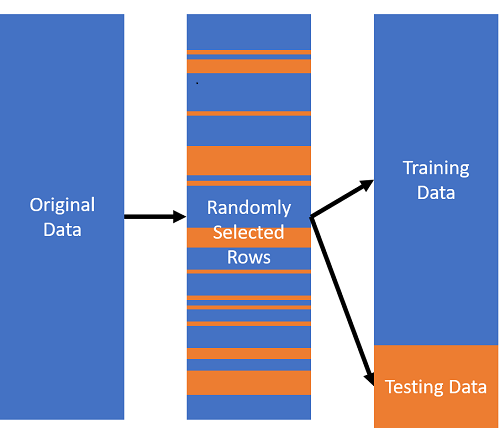

## **Dataset Display**

In [4]:
import matplotlib.pyplot as plt

# Number of digits to display
n = 15

# Create a figure to display the images
plt.figure(figsize=(30, 10))

# Loop through the first 'n' images
for i in range(n):
    # Create a subplot within the figure
    pic = plt.subplot(3, n, i + 1)

    # Display the original image
    plt.imshow(x_test[i].reshape(28, 28))

    # Set colormap to grayscale
    # plt.gray()


    # Hide x-axis and y-axis labels and ticks
    pic.get_xaxis().set_visible(False)
    pic.get_yaxis().set_visible(False)

# Show the figure with the images
# plt.show()

# Close the figure
# plt.close()


## **Flattening the Images**

In [20]:
# Print the shapes of the original training data and labels
print("Previous x_train shape: {} \nPrevious y_test shape:{}".format(x_train.shape, x_test.shape))

# Reshape training and testing data to a flat format (flattening the images)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape)
print(x_test.shape)

Previous x_train shape: (60000, 784) 
Previous y_train shape:(10000, 784)
(60000, 784)
(10000, 784)


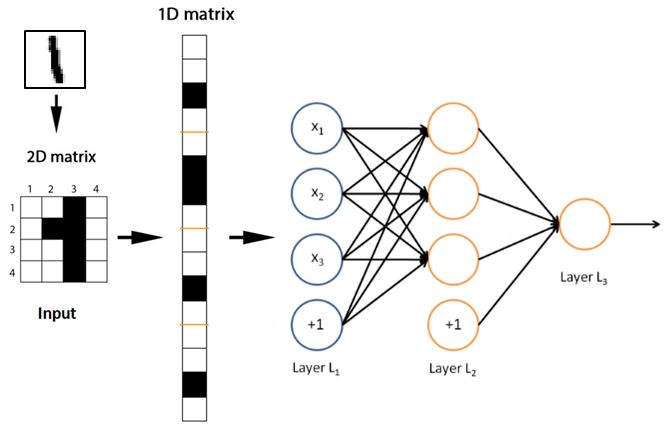

## **Min-Max Scalling**

In [24]:
# Convert the data type of the images to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print(x_train.shape)
print(x_test.shape)
# Normalize the pixel values to a range between 0 and 1  # Zero is for Black  #1 for White
for_1 = x_train / 255
for_0 = x_test / 255

print(for_1.shape)
print(for_0.shape)

(60000, 784)
(10000, 784)
(60000, 784)
(10000, 784)


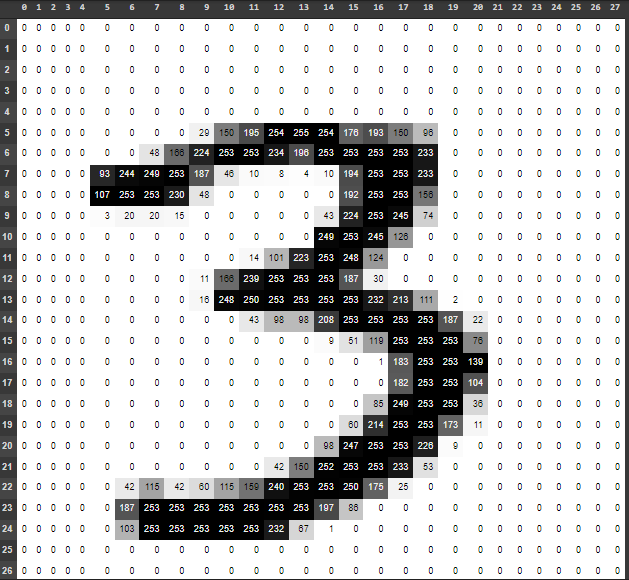

## **Processing the Target variable**

In [22]:
# Number of classes in the dataset
classes = 10
# Convert the labels to one-hot encoded format
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

# Print the shapes of the preprocessed training data and labels
print("New x_train shape: {} \nNew y_train shape:{}".format(x_train.shape, y_train.shape))
print("New x_test shape: {} \nNew y_test shape:{}".format(x_test.shape, y_test.shape))

New x_train shape: (60000, 784) 
New y_train shape:(60000, 10)
New x_train shape: (10000, 784) 
New y_train shape:(10000, 10)


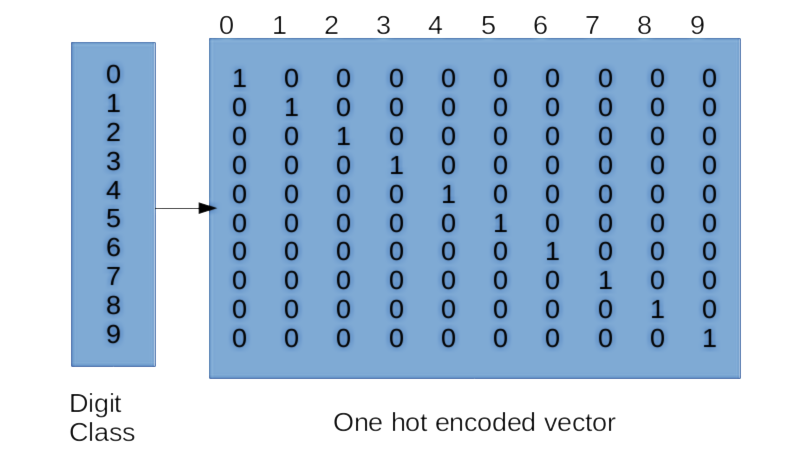

## **Setting up Hyper-parameters**

In [8]:
# Define the input size for each data sample (e.g., image pixels)
input_size = 784

# Specify the number of data samples to process in each batch
batch_size = 200

# Define the number of neurons in the first hidden layer
hidden1 = 400

# Define the number of neurons in the second hidden layer
hidden2 = 20

# Define the total number of classes/categories in the dataset
classes = 10

# Set the number of complete passes through the dataset during training
epochs = 5


## **Building the FCN Model**

In [9]:
### 4. Build the model ###

# Create a Sequential model, which allows us to build a neural network layer by layer
model = Sequential()

# Add the first hidden layer with 'hidden1' neurons, using ReLU activation function
# The 'input_dim' specifies the input size for this layer
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
# output = relu(dot(W, input) + bias)

# Add the second hidden layer with 'hidden2' neurons, also using ReLU activation function
model.add(Dense(hidden2, activation='relu'))


# Add the output layer with 'classes' neurons, using softmax activation function
# Softmax activation ensures that the output values represent probabilities of each class
model.add(Dense(classes, activation='softmax'))

### Compilation ###

# Compile the model by specifying the loss function, optimizer, and evaluation metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer='sgd')

# Display a summary of the model architecture, showing the layers and parameter counts
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 400)                 │         314,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           8,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,230 (1.23 MB)

 Trainable params: 322,230 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

## **Parameters Calculations**
**output = relu(dot(W, input) + bias)**


(400*784) + 400 = 314000 = 0.3 million paramters


**parameters for Chat-gpt 4 = 1760000000000 = 1.76 trillion parameters**

## **Training The Model**

In [10]:
# Import necessary libraries
from time import time

# Record the current time to measure training time
tic = time()

# Fit the model on the training data
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# Record the time after model training
toc = time()

# Calculate and print the time taken for model training
print("Model training took {} secs".format(toc - tic))

# Testing the trained model
### 5. Test
# You can continue your code from here...


Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.4542 - loss: 1.7925
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8327 - loss: 0.7111
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8781 - loss: 0.4831
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8934 - loss: 0.4020
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9007 - loss: 0.3629
Model training took 30.802342653274536 secs


## **Testing The Model**

In [11]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(x_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, y_test)
print("\nTest accuracy: {}".format(test_accuracy))



Test accuracy: 0.8754


In [12]:
# Define a mask for selecting a range of indices (20 to 49)
mask = range(20, 50)

# Select the first 20 samples from the test set for visualization
X_valid = x_test[0:20]
actual_labels = y_test[0:20]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


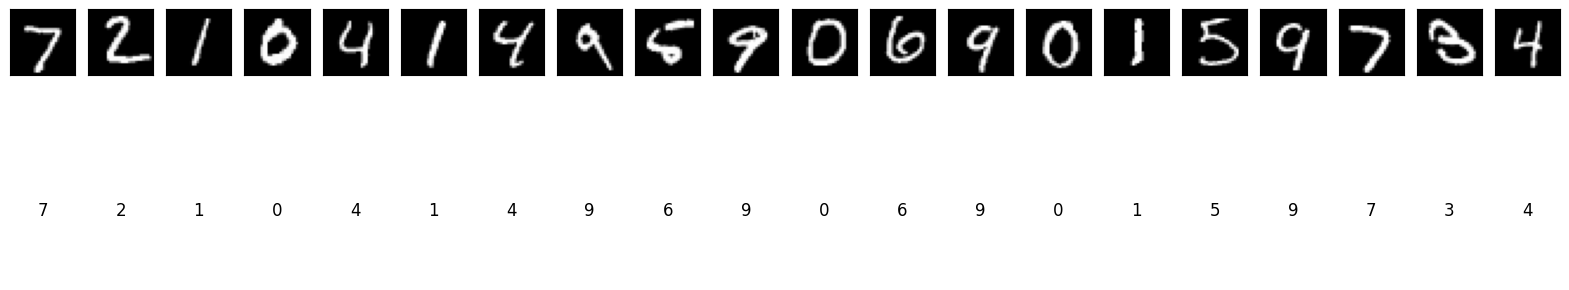

In [13]:
# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()


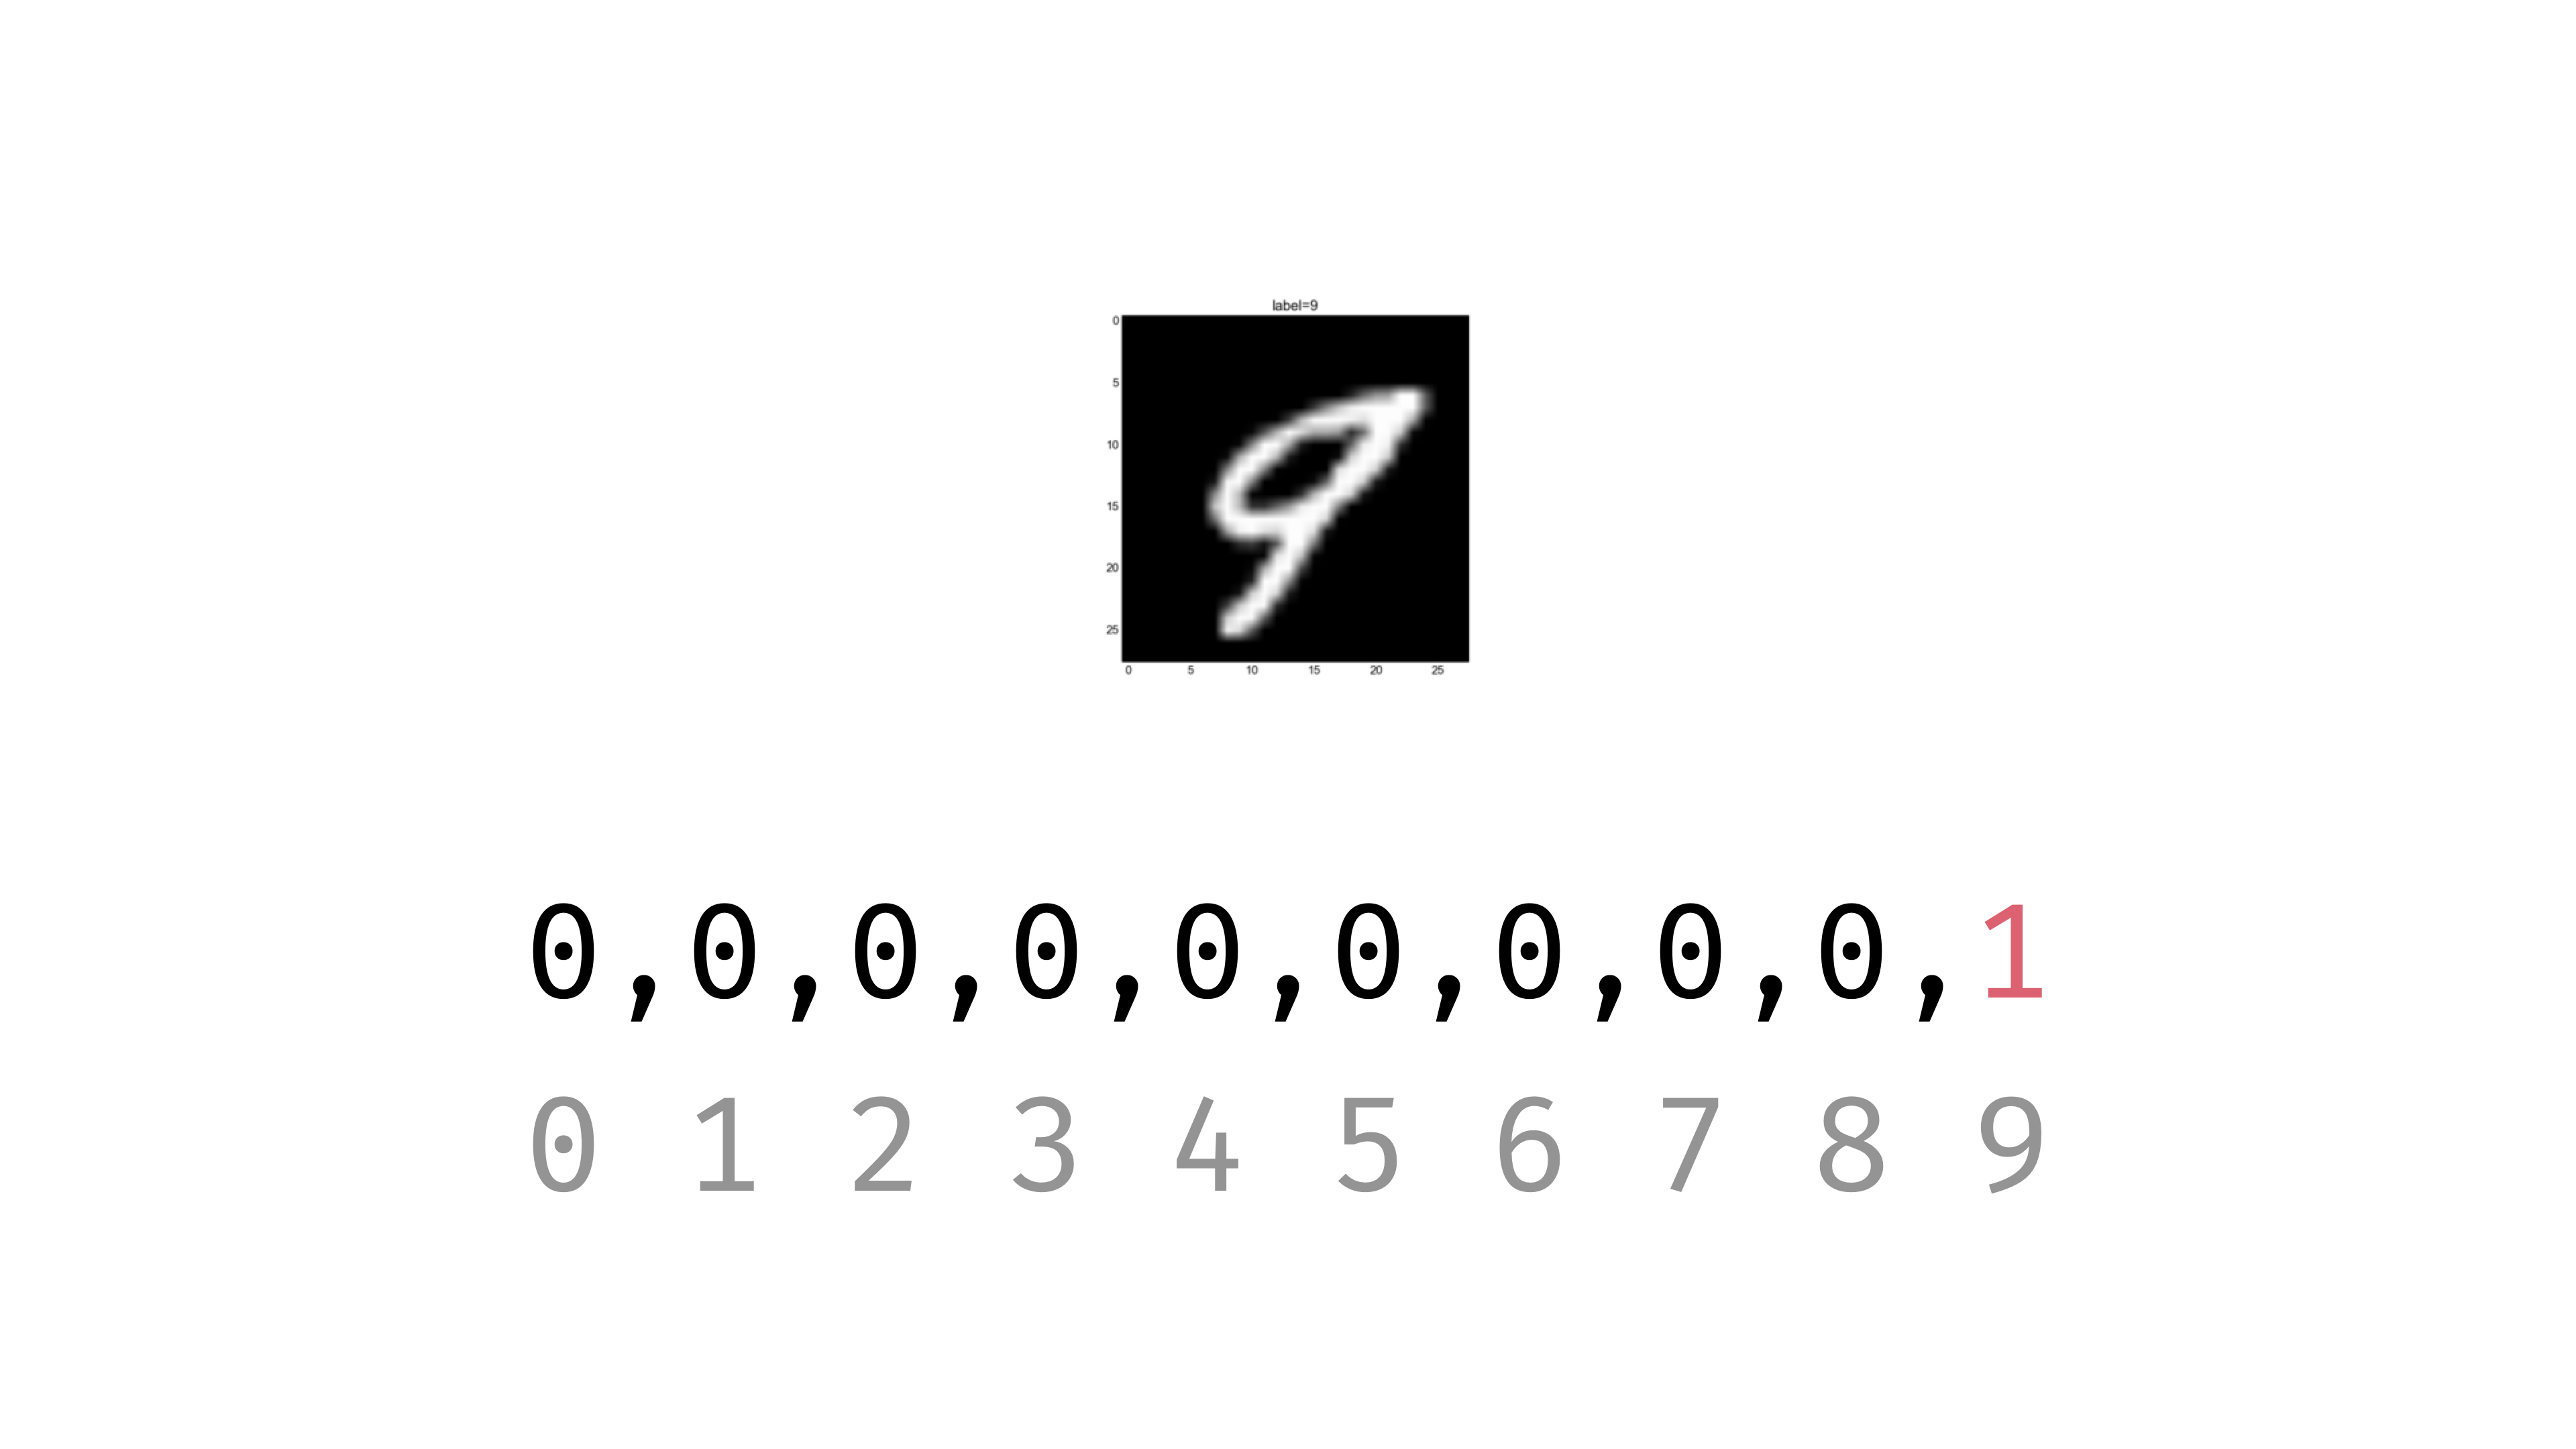